In [1]:
#importiamo le librerie di base
import numpy as np 
import pandas as pd 
import librosa.display  # questa sereve per la rappresentazione grafica e gestione di file audio
import matplotlib.pyplot as plt  # serve per calcoli matematic 

In [2]:
#importiamo il dataset
music_data = pd.read_csv('Data/features_30_sec.csv') 
music_data_3sec = pd.read_csv('Data/features_3_sec.csv') 

music_data.head(5) #per vedere le prime 5 colonne del dataset



,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
music_data['label'].value_counts() # andiamo a vedere il n° di dati e tipologia per ogni genere

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

In [4]:
music_data_3sec['label'].value_counts() # andiamo a vedere il n° di dati e tipologia per ogni genere

label
blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: count, dtype: int64

Blue


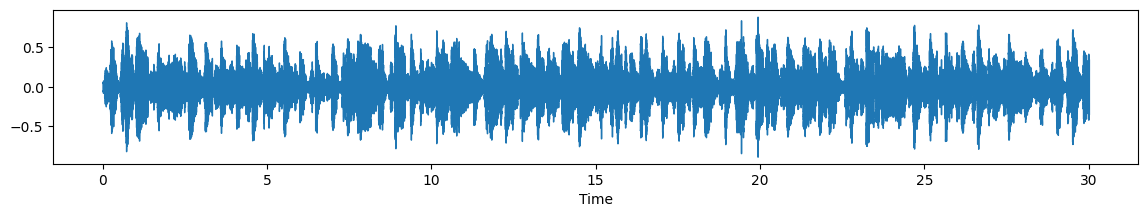

In [5]:
#Stampo la struttura del file audio medio del genere BLUES
path = 'Data/genres_original/blues/blues.00000.wav' 
plt.figure(figsize=(14, 2)) 
x, sr = librosa.load(path) 
librosa.display.waveshow(x, sr=sr) 
  
print("Blue")

In [6]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
music_data['label'] = label_encoder.fit_transform(music_data['label'])

music_data_3sec['label'] = label_encoder.fit_transform(music_data_3sec['label'])

In [7]:
X = music_data.drop(['label','filename'],axis=1) 
y = music_data['label']

X_3sec = music_data_3sec.drop(['label','filename'],axis=1) 
y_3sec = music_data_3sec['label']

In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer

# Creazione di un DataFrame di esempio


# Standardizzazione
scaler = StandardScaler()
data_standardized = scaler.fit_transform(X)

# Robust Scaler
robust_scaler = RobustScaler()
data_robust_scaled = robust_scaler.fit_transform(X)

# MaxAbs Scaler
max_abs_scaler = MaxAbsScaler()
data_max_abs_scaled = max_abs_scaler.fit_transform(X)

# Quantile Transformation
quantile_transformer = QuantileTransformer(output_distribution='uniform')
data_quantile_scaled = quantile_transformer.fit_transform(X)


print("Standardized Data:\n", data_standardized)
print("Robust Scaled Data:\n", data_robust_scaled)
print("MaxAbs Scaled Data:\n", data_max_abs_scaled)
print("Quantile Transformed Data:\n", data_quantile_scaled)



Standardized Data:
 [[-0.13282213 -0.35013678  0.31258717 ... -0.30059734  0.60406407
  -0.51298758]
 [-0.13282213 -0.46248155  1.11757233 ... -0.40708699  0.42412706
  -0.53842129]
 [-0.13282213 -0.18422456 -0.13770124 ... -0.52729705 -0.29618888
  -0.8749539 ]
 ...
 [-0.13282213  0.65463736 -1.43198917 ... -0.63865065 -0.26361549
  -0.89060474]
 [-0.13282213 -0.19833855  0.66814351 ... -0.5114848  -0.65064889
  -0.63768256]
 [-0.13282213 -0.2483391  -0.05894495 ...  0.16033426  0.5868411
  -0.4526752 ]]
Robust Scaled Data:
 [[ 0.         -0.28406716  0.23911547 ... -0.06393215  0.50999105
  -0.28486901]
 [ 0.         -0.36289952  0.93389623 ... -0.17111348  0.36259004
  -0.3116059 ]
 [ 0.         -0.16764649 -0.14952738 ... -0.29210434 -0.22747925
  -0.66538193]
 ...
 [ 0.          0.42098323 -1.26662419 ... -0.40418121 -0.20079574
  -0.68183469]
 [ 0.         -0.17755028  0.54599529 ... -0.27618938 -0.51784622
  -0.41595316]
 [ 0.         -0.21263568 -0.08155302 ...  0.39999329  0.4

In [9]:
# è la soluzione migliore visto che abbiamo dei dati ben distribuiti
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)
X_standardized_3sec = standard_scaler.fit_transform(X_3sec)

In [10]:

#Effettuo l'operazione di split del data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#X_train_3sec, X_test_3sec, y_train_3sec, y_test_3sec = train_test_split(X_standardized_3sec, y_3sec, test_size=0.3, random_state=42)
#X_train_3sec.shape, X_test_3sec.shape, y_train_3sec.shape, y_test_3sec.shape


((700, 58), (300, 58), (700,), (300,))

In [11]:
X_train_3sec, X_test_3sec, y_train_3sec, y_test_3sec = train_test_split(X_standardized_3sec, y_3sec, test_size=0.3, random_state=42)
X_train_3sec.shape, X_test_3sec.shape, y_train_3sec.shape, y_test_3sec.shape

((6993, 58), (2997, 58), (6993,), (2997,))

<H2> KNN


<h3> Definizione della scelta del k Tramite Grid_Search

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definire i possibili valori di K
param_grid = {'n_neighbors': list(range(1, 30))}

# Usare GridSearchCV per trovare il valore ottimale
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

grid_search_3sec = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_3sec.fit(X_train_3sec, y_train_3sec)

# Miglior valore di K
print(f"Miglior valore di K: {grid_search.best_params_}")
print(f"Accuracy con il miglior K: {grid_search.best_score_}")

# Miglior valore di K 3 sec
print(f"Miglior valore di K: {grid_search_3sec.best_params_}")
print(f"Accuracy con il miglior K: {grid_search_3sec.best_score_}")

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Miglior valore di K: {'n_neighbors': 1}
Accuracy con il miglior K: 0.6628571428571429
Miglior valore di K: {'n_neighbors': 1}
Accuracy con il miglior K: 0.8897444628853023


Implemento KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Inizializzare il modello KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn_3sec = KNeighborsClassifier(n_neighbors=1)

# Addestrare il modello
knn_3sec.fit(X_train, y_train)
knn.fit(X_train, y_train)




# PROVO A IMPLEMENTARE E FARE MIGLIORAMENTI CON K-FOLD CROSS VALIDATION
# Implementiamo la K-Fold Cross-Validation con StratifiedKFold per preservare le proporzioni delle classi
#kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
#kf_ = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Fare previsioni sul set di test
y_pred = knn.predict(X_test)
y_pred_3sec = knn_3sec.predict(X_test_3sec)



# Valutare l'accuratezza
accuracy_knn = accuracy_score(y_test, y_pred)
#print(f"KNN Accuracy: {accuracy_knn}")

accuracy_knn_3sec = accuracy_score(y_test_3sec, y_pred_3sec)
#print(f"KNN Accuracy: {accuracy_knn_3sec}")

# Calcoliamo le score di cross-validation (Accuracy)
#cv_scores = cross_val_score(knn, X_train_3sec, y_train_3sec, cv=kf, scoring='accuracy')  #-------------
#cv_scores_ = cross_val_score(knn, X_train, y_train, cv=kf_, scoring='accuracy')  #-------------

# Precision, Recall, F1-Score per classificazione multiclasse
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

precision_3sec = precision_score(y_test_3sec, y_pred_3sec, average='weighted')
recall_3sec = recall_score(y_test_3sec, y_pred_3sec, average='weighted')
f1_3sec = f1_score(y_test_3sec, y_pred_3sec, average='weighted')

print(" -------------DATASET 30 SEC ----------------")
print(f"KNN Accuracy: {accuracy_knn}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(" -------------DATASET 3 SEC ----------------")
print(f"KNN Accuracy: {accuracy_knn_3sec}")
print(f"Precision 3: {precision_3sec:.4f}")
print(f"Recall 3: {recall_3sec:.4f}")
print(f"F1-Score 3: {f1_3sec:.4f}")



#----------------


# Confusion Matrix
#conf_matrix = confusion_matrix(y_test, y_pred)
#print(f"Confusion Matrix:\n{conf_matrix}")

# Report dettagliato con Precision, Recall, F1-Score per ciascuna classe

#print("Classification Report:\n", classification_report(y_test, y_pred))


 -------------DATASET 30 SEC ----------------
KNN Accuracy: 0.68
Precision: 0.6912
Recall: 0.6800
F1-Score: 0.6820
 -------------DATASET 3 SEC ----------------
KNN Accuracy: 0.8064731398064732
Precision 3: 0.8099
Recall 3: 0.8065
F1-Score 3: 0.8072


Porvo a Migliorare KNN con K-fold

In [14]:
# PROVO A IMPLEMENTARE E FARE MIGLIORAMENTI CON K-FOLD CROSS VALIDATION
# Implementiamo la K-Fold Cross-Validation con StratifiedKFold per preservare le proporzioni delle classi
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
kf_ = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calcoliamo le score di cross-validation (Accuracy)
cv_scores = cross_val_score(knn, X_train_3sec, y_train_3sec, cv=kf, scoring='accuracy')  #-------------
cv_scores_ = cross_val_score(knn, X_train, y_train, cv=kf_, scoring='accuracy')  #-------------


# Stampiamo i risultati
print(" -------------DATASET 3 SEC ----------------")
print(f"K-Fold Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation: {np.std(cv_scores)}")


#spieghiamo perche non ci sono miglioramenti (pochi dati ???)
print(" -------------DATASET 30 SEC ----------------")
print(f"K-Fold Cross-Validation Accuracy Scores: {cv_scores_}")
print(f"Mean Accuracy: {np.mean(cv_scores_)}")
print(f"Standard Deviation: {np.std(cv_scores_)}")

 -------------DATASET 3 SEC ----------------
K-Fold Cross-Validation Accuracy Scores: [0.90207291 0.89706934 0.89063617 0.88483548 0.88340486]
Mean Accuracy: 0.8916037512999783
Standard Deviation: 0.007119597592449979
 -------------DATASET 30 SEC ----------------
K-Fold Cross-Validation Accuracy Scores: [0.75714286 0.64285714 0.59285714 0.62142857 0.67142857]
Mean Accuracy: 0.6571428571428571
Standard Deviation: 0.056242913385798635


<H1>RANDOM FOREST

In [15]:
import time
import catboost as cb 
from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0) 
cbc = cb.CatBoostClassifier(verbose=0, eval_metric='Accuracy', loss_function='MultiClass') 
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05) 


print(" -------------DATASET 30 SEC ----------------")

for clf in (rf, xgb, cbc): 
    start = time.time() 
    clf.fit(X_train, y_train) 
    preds = clf.predict(X_test) 
    end = time.time()

    print(clf.__class__.__name__,accuracy_score(y_test, preds))
    print(clf.__class__.__name__,precision_score(y_test, preds, average='macro'))
    #print(f"Random Forest Accuracy: {accuracy_score}")
    #print("Classification Report:\n", classification_report(y_test, preds))


print(" -------------DATASET 3 SEC ----------------")

for clf in (rf, xgb, cbc): 
    start = time.time() 
    clf.fit(X_train_3sec, y_train_3sec) 
    preds_3sec = clf.predict(X_test_3sec) 
    end = time.time()

    print(clf.__class__.__name__,accuracy_score(y_test_3sec, preds_3sec))
    print(clf.__class__.__name__,precision_score(y_test_3sec, preds_3sec, average='macro'))
    

 -------------DATASET 30 SEC ----------------
RandomForestClassifier 0.7366666666666667
RandomForestClassifier 0.7498736327287332
XGBClassifier 0.7366666666666667
XGBClassifier 0.7416375837112141
CatBoostClassifier 0.7933333333333333
CatBoostClassifier 0.801400178512603
 -------------DATASET 3 SEC ----------------
RandomForestClassifier 0.8131464798131465
RandomForestClassifier 0.8144316587493936
XGBClassifier 0.9069069069069069
XGBClassifier 0.9067813786795493
CatBoostClassifier 0.9099099099099099
CatBoostClassifier 0.9095304623348828


Proviamo Ad Applicare la Corss validation 

In [16]:
from sklearn.model_selection import cross_val_score


print(" -------------DATASET 30 SEC ----------------")
# Cross-validation per RandomForest
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracy: {cv_scores_rf.mean()}")

# Cross-validation per CatBoost
cv_scores_catboost = cross_val_score(cbc, X_train, y_train, cv=5, scoring='accuracy')
print(f"CatBoost CV Accuracy: {cv_scores_catboost.mean()}")

# Cross-validation per XGBoost
cv_scores_xgb = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
print(f"XGBoost CV Accuracy: {cv_scores_xgb.mean()}")



#Capire perche con k-fold peggiora invece di migliorare
print(" -------------DATASET 3 SEC ----------------")

# Cross-validation per RandomForest
cv_scores_rf = cross_val_score(rf, X_train_3sec, y_train_3sec, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracy: {cv_scores_rf.mean()}")

# Cross-validation per CatBoost
cv_scores_catboost = cross_val_score(cbc, X_train_3sec, y_train_3sec, cv=5, scoring='accuracy')
print(f"CatBoost CV Accuracy: {cv_scores_catboost.mean()}")

# Cross-validation per XGBoost
cv_scores_xgb = cross_val_score(xgb, X_train_3sec, y_train_3sec, cv=5, scoring='accuracy')
print(f"XGBoost CV Accuracy: {cv_scores_xgb.mean()}")

 -------------DATASET 30 SEC ----------------
Random Forest CV Accuracy: 0.7685714285714285
CatBoost CV Accuracy: 0.8
XGBoost CV Accuracy: 0.7542857142857142
 -------------DATASET 3 SEC ----------------


KeyboardInterrupt: 

In [42]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier




svc = SVC(kernel= "sigmoid", gamma  = 1.0)
#mnb = MultinomialNB()
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)


print(" -------------DATASET 30 SEC ----------------")

for clf in (svc,lrc,abc,bc,etc): 
    start = time.time() 
    clf.fit(X_train, y_train) 
    preds = clf.predict(X_test) 
    end = time.time()

    print(clf.__class__.__name__,accuracy_score(y_test, preds))
    print(clf.__class__.__name__,precision_score(y_test, preds, average='macro'))
    #print(f"Random Forest Accuracy: {accuracy_score}")
    #print("Classification Report:\n", classification_report(y_test, preds))


print(" -------------DATASET 3 SEC ----------------")

for clf in (svc,lrc,abc,bc,etc): 
    start = time.time() 
    clf.fit(X_train_3sec, y_train_3sec) 
    preds_3sec = clf.predict(X_test_3sec) 
    end = time.time()

    print(clf.__class__.__name__,accuracy_score(y_test_3sec, preds_3sec))
    print(clf.__class__.__name__,precision_score(y_test_3sec, preds_3sec, average='macro'))





 -------------DATASET 30 SEC ----------------
SVC 0.26
SVC 0.28533858989365746
LogisticRegression 0.7033333333333334
LogisticRegression 0.7177606314967284


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier 0.31666666666666665
AdaBoostClassifier 0.18494294586036802


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BaggingClassifier 0.72
BaggingClassifier 0.7242822822822823
ExtraTreesClassifier 0.7633333333333333
ExtraTreesClassifier 0.7722820465979034
 -------------DATASET 3 SEC ----------------
SVC 0.1788455121788455
SVC 0.19274626451304552
LogisticRegression 0.7217217217217218
LogisticRegression 0.7162246849032571


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier 0.46479813146479815
AdaBoostClassifier 0.44677936846288324
BaggingClassifier 0.8278278278278278
BaggingClassifier 0.8295227266981163
ExtraTreesClassifier 0.8768768768768769
ExtraTreesClassifier 0.8767423098339322


In [26]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import soundfile as sf

# Carica i file audio da una directory usando soundfile
def load_audio(file_path):
    try:
        audio, sr = sf.read(file_path, always_2d=False)
        if audio.ndim == 2:
            audio = audio.mean(axis=1)  # Convertire a mono
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None, None
    return audio, sr

# Carica i file audio da una directory e ottieni le feature
def load_data(data_dir):
    labels = []
    features = []
    classes = os.listdir(data_dir)

    for class_label in classes:
        class_dir = os.path.join(data_dir, class_label)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            audio, sr = load_audio(file_path)
            if audio is not None and sr is not None:
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                mfccs = np.mean(mfccs.T, axis=0)
                features.append(mfccs)
                labels.append(class_label)
    
    features = np.array(features)
    labels = np.array(labels)
    return features, labels, classes

data_dir = "Data/genres_original/"
X, y, class_names = load_data(data_dir)

# Convertire le etichette in numeri
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Suddividere i dati in training, validation e test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Aggiungere un asse ai dati per adattarli all'input richiesto dalla CNN
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]


Error loading Data/genres_original/jazz\jazz.00054.wav: Error opening 'Data/genres_original/jazz\\jazz.00054.wav': Format not recognised.


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2

# Definire il modello CNN
model = Sequential()

# Primo strato convoluzionale
model.add(Input(shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))

# Secondo strato convoluzionale
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))

# Terzo strato convoluzionale
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))

# Appiattimento (Flatten) della matrice
model.add(Flatten())

# Strato denso (completamente connesso)
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Strato di output con softmax per classificazione multiclasse
model.add(Dense(len(class_names), activation='softmax'))

# Compilazione del modello
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

# Callback per ridurre il learning rate se la loss non migliora
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Mostra il riepilogo del modello
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 13, 1, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 1, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 3, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 1, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

-------------------------------------------------------------------

<H1>RETE NEURALE FATTA CON IL FILE DA 30 SEC


In [34]:
import os
import numpy as np
import librosa
import soundfile as sf
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Carica i file audio da una directory
def load_data(data_dir):
    labels = []
    features = []
    classes = os.listdir(data_dir)

    for class_label in classes:
        class_dir = os.path.join(data_dir, class_label)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            try:
                audio, sr = sf.read(file_path)
                if audio.ndim == 2:
                    audio = np.mean(audio, axis=1)  # Convertire a mono
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                mfccs = np.mean(mfccs.T, axis=0)
                features.append(mfccs)
                labels.append(class_label)
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
    
    features = np.array(features)
    labels = np.array(labels)
    return features, labels, classes

data_dir = "Data/genres_original/"
X, y, class_names = load_data(data_dir)

# Convertire le etichette in numeri
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Suddividere i dati in training, validation e test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Aggiungere un altro asse ai dati per adattarli all'input richiesto dalla CNN (batch_size, height, width, channels)
X_train = X_train[..., np.newaxis, np.newaxis]
X_val = X_val[..., np.newaxis, np.newaxis]
X_test = X_test[..., np.newaxis, np.newaxis]


Error loading Data/genres_original/jazz\jazz.00054.wav: Error opening 'Data/genres_original/jazz\\jazz.00054.wav': Format not recognised.


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2

# Definire il modello CNN
model = Sequential()

# Primo strato convoluzionale
model.add(Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))

# Secondo strato convoluzionale
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))

# Terzo strato convoluzionale
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))

# Appiattimento (Flatten) della matrice
model.add(Flatten())

# Strato denso (completamente connesso)
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Strato di output con softmax per classificazione multiclasse
model.add(Dense(len(class_names), activation='softmax'))

# Compilazione del modello
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

# Callback per ridurre il learning rate se la loss non migliora
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Mostra il riepilogo del modello
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 13, 1, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 1, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 1, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.1145 - loss: 6.6414 - val_accuracy: 0.1000 - val_loss: 4.9582 - learning_rate: 1.0000e-04
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1195 - loss: 5.5613 - val_accuracy: 0.1200 - val_loss: 4.6618 - learning_rate: 1.0000e-04
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1451 - loss: 5.1354 - val_accuracy: 0.1700 - val_loss: 4.5297 - learning_rate: 1.0000e-04
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1214 - loss: 4.8895 - val_accuracy: 0.1300 - val_loss: 4.4344 - learning_rate: 1.0000e-04
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1187 - loss: 4.7694 - val_accuracy: 0.1700 - val_loss: 4.3534 - learning_rate: 1.0000e-04
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1295 - loss: 4.6445 - val_accuracy: 0.1600 - val_loss: 4.2827 - learning_rate: 1.0000e-04
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1419 - loss: 4.4600

<Figure size 2000x1500 with 0 Axes>

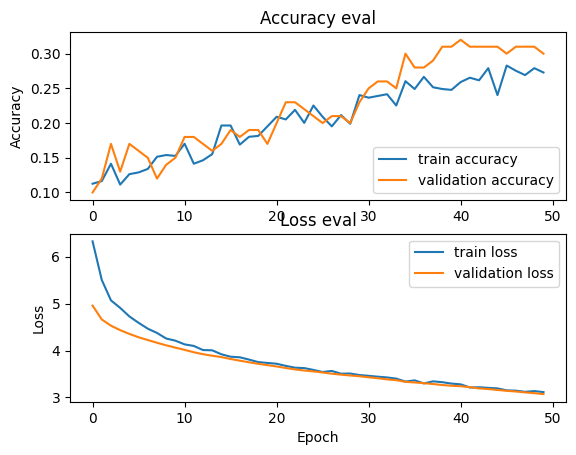

In [36]:
# Data Augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Addestramento del modello con Data Augmentation
hist = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[reduce_lr, early_stopping]
)

# Funzione per tracciare i risultati dell'addestramento
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)

    # Accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="validation accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # Loss subplot
    axs[1].plot(hist.history["loss"], label="train loss")
    axs[1].plot(hist.history["val_loss"], label="validation loss")    
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss eval")
    
    plt.show()

# Tracciamento delle performance durante l'addestramento
plot_history(hist)

# Valutazione del modello sui

<H1>PROVANDO A DIVIDERE I FILE WAV DA 30 -> 3 SEC


In [44]:
import os
import librosa
import soundfile as sf

# Funzione per dividere un file audio in segmenti più piccoli
def split_audio(file_path, segment_length=3):
    audio, sr = librosa.load(file_path, sr=None, mono=True)
    segments = []
    for start in range(0, len(audio), int(segment_length * sr)):
        end = start + int(segment_length * sr)
        if end > len(audio):
            break
        segments.append(audio[start:end])
    return segments, sr


In [45]:
# Creare cartelle per salvare i segmenti audio
output_base_dir = 'Data/genres_original_3s/'

def create_output_directories(data_dir, output_base_dir):
    genres = os.listdir(data_dir)
    for genre in genres:
        genre_dir = os.path.join(output_base_dir, genre)
        os.makedirs(genre_dir, exist_ok=True)

data_dir = "Data/genres_original/"
create_output_directories(data_dir, output_base_dir)


In [46]:
# Carica e suddivide i file audio da una directory e salva i segmenti
def load_split_and_save_data(data_dir, segment_length=3, output_base_dir='output_segments'):
    classes = os.listdir(data_dir)
    
    for class_label in classes:
        class_dir = os.path.join(data_dir, class_label)
        output_class_dir = os.path.join(output_base_dir, class_label)
        
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            segments, sr = split_audio(file_path, segment_length)
            
            for i, segment in enumerate(segments):
                segment_filename = f"{os.path.splitext(file_name)[0]}_segment_{i}.wav"
                segment_filepath = os.path.join(output_class_dir, segment_filename)
                sf.write(segment_filepath, segment, sr)

# Esegui il processo
load_split_and_save_data(data_dir, segment_length=3, output_base_dir=output_base_dir)

print(f"Segmenti audio salvati nella directory: {output_base_dir}")


Segmenti audio salvati nella directory: Data/genres_original_3s/


<h2>Ora faccio la CNN con i dati da 3 sec

In [49]:
import os
import numpy as np
import librosa
import soundfile as sf
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Carica i file audio da una directory
def load_data(data_dir):
    labels = []
    features = []
    classes = os.listdir(data_dir)

    for class_label in classes:
        class_dir = os.path.join(data_dir, class_label)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            try:
                audio, sr = sf.read(file_path)
                if audio.ndim == 2:
                    audio = np.mean(audio, axis=1)  # Convertire a mono
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                mfccs = np.mean(mfccs.T, axis=0)
                features.append(mfccs)
                labels.append(class_label)
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
    
    features = np.array(features)
    labels = np.array(labels)
    return features, labels, classes

data_dir = "Data/genres_original_3s/"
X, y, class_names = load_data(data_dir)

# Convertire le etichette in numeri
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Suddividere i dati in training, validation e test set
X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Aggiungere un altro asse ai dati per adattarli all'input richiesto dalla CNN (batch_size, height, width, channels)
X_train = X_train[..., np.newaxis, np.newaxis]
X_val = X_val[..., np.newaxis, np.newaxis]
X_test = X_test[..., np.newaxis, np.newaxis]


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2

# Definire il modello CNN
model = Sequential()

# Primo strato convoluzionale
model.add(Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))

# Secondo strato convoluzionale
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))

# Terzo strato convoluzionale
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Dropout(0.3))

# Appiattimento (Flatten) della matrice
model.add(Flatten())

# Strato denso (completamente connesso)
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Strato di output con softmax per classificazione multiclasse
model.add(Dense(len(class_names), activation='softmax'))

# Compilazione del modello
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

# Callback per ridurre il learning rate se la loss non migliora
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Mostra il riepilogo del modello
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 13, 1, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 6, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 6, 1, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 3, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 3, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 1, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1063 - loss: 5.3289 - val_accuracy: 0.2375 - val_loss: 4.0109 - learning_rate: 1.0000e-04
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1393 - loss: 4.0534 - val_accuracy: 0.2465 - val_loss: 3.6630 - learning_rate: 1.0000e-04
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1710 - loss: 3.6919 - val_accuracy: 0.2535 - val_loss: 3.4329 - learning_rate: 1.0000e-04
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1950 - loss: 3.4727 - val_accuracy: 0.2866 - val_loss: 3.2341 - learning_rate: 1.0000e-04
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2180 - loss: 3.2762 - val_accuracy: 0.2996 - val_loss: 3.0674 - learning_rate: 1.0000e-04
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2283 - loss: 3.1375 - val_accuracy: 0.3196 - val_loss: 2.9213 - learning_rate: 1.0000e-04
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2438 - lo

<Figure size 2000x1500 with 0 Axes>

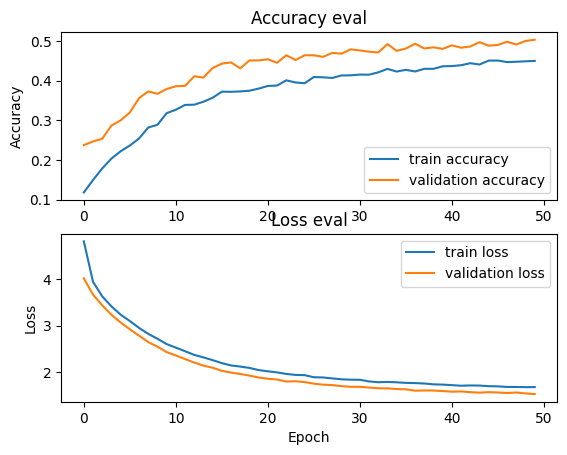

In [51]:
# Data Augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Addestramento del modello con Data Augmentation
hist = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[reduce_lr, early_stopping]
)

# Funzione per tracciare i risultati dell'addestramento
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)

    # Accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="validation accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # Loss subplot
    axs[1].plot(hist.history["loss"], label="train loss")
    axs[1].plot(hist.history["val_loss"], label="validation loss")    
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss eval")
    
    plt.show()

# Tracciamento delle performance durante l'addestramento
plot_history(hist)

# Valutazione del modello sui

<VGG16>

<h2>VGG16

In [53]:
import numpy as np

# Funzione per adattare i dati audio alla forma richiesta da VGG16
def prepare_vgg16_input(X):
    # Ridimensiona ogni segmento audio a (224, 224)
    X_resized = np.zeros((X.shape[0], 224, 224, 3))
    
    for i in range(X.shape[0]):
        resized_segment = np.resize(X[i], (224, 224))
        X_resized[i] = np.stack([resized_segment, resized_segment, resized_segment], axis=-1)  # Replicare su 3 canali

    return X_resized

# Preparare i dati per VGG16
X_train_vgg16 = prepare_vgg16_input(X_train)
X_val_vgg16 = prepare_vgg16_input(X_val)
X_test_vgg16 = prepare_vgg16_input(X_test)


In [54]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Carica il modello VGG16 pre-addestrato, escludendo i livelli superiori
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Aggiungi i tuoi strati al modello VGG16
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

# Definire il modello finale
model = Model(inputs=base_model.input, outputs=predictions)

# Congelare i pesi del modello base
for layer in base_model.layers:
    layer.trainable = False

# Compilazione del modello
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

# Mostra il riepilogo del modello
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 6,425,354 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Data Augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Addestramento del modello
hist = model.fit(
    datagen.flow(X_train_vgg16, y_train, batch_size=32),
    validation_data=(X_val_vgg16, y_val),
    epochs=100,
    callbacks=[reduce_lr, early_stopping]
)

# Funzione per tracciare i risultati dell'addestramento
def plot_history(hist):
    plt.figure(figsize=(20, 15))
    fig, axs = plt.subplots(2)

    # Accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # Loss subplot
    axs[1].plot(hist.history["loss"], label="train loss")
    axs[1].plot(hist.history["val_loss"], label="validation loss")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss eval")

    plt.show()

plot_history(hist)

# Valutazione del modello sui dati di test
test_loss, test_accuracy = model.evaluate(X_test_vgg16, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")


Epoch 1/100
 95/250 ━━━━━━━━━━━━━━━━━━━━ 11:47 5s/step - accuracy: 0.1248 - loss: 7.9641

KeyboardInterrupt: 

Durante l'allenamento, dovresti monitorare sia la perdita (loss) che la precisione (accuracy) sul set di convalida per capire se il modello sta migliorando. Se la perdita continua a diminuire e la precisione aumenta per alcune epoche, ma poi inizia a peggiorare, potresti essere vicino all'overfitting, e dovresti fermarti.

In [3]:
import os
import numpy as np
import librosa
import soundfile as sf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

def load_data(data_dir, segment_length=3):
    labels = []
    features = []
    classes = os.listdir(data_dir)

    for class_label in classes:
        class_dir = os.path.join(data_dir, class_label)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            audio, sr = librosa.load(file_path, sr=None, mono=True)
            for start in range(0, len(audio), int(segment_length * sr)):
                end = start + int(segment_length * sr)
                if end > len(audio):
                    break
                segment = audio[start:end]
                mfccs = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=13)
                mfccs = np.mean(mfccs.T, axis=0)
                features.append(mfccs)
                labels.append(class_label)

    return np.array(features), np.array(labels), classes

data_dir = "Data/genres_original/"
X, y, class_names = load_data(data_dir)



In [4]:
# Funzione per adattare i dati audio alla forma richiesta da VGG16
def prepare_vgg16_input(X):
    X_resized = np.zeros((X.shape[0], 224, 224, 3))
    for i in range(X.shape[0]):
        resized_segment = np.resize(X[i], (224, 224))
        X_resized[i] = np.stack([resized_segment, resized_segment, resized_segment], axis=-1)
    return X_resized

# Preparare i dati per VGG16
X = prepare_vgg16_input(X)

# Convertire le etichette in numeri
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Suddividere i dati in training, validation e test set
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


: 

In [58]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Carica il modello VGG16 pre-addestrato, escludendo i livelli superiori
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Aggiungi i tuoi strati al modello VGG16
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

# Definire il modello finale
model = Model(inputs=base_model.input, outputs=predictions)

# Congelare i pesi del modello base
for layer in base_model.layers:
    layer.trainable = False

# Compilazione del modello
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

# Mostra il riepilogo del modello
model.summary()


Model: "functional_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 6,425,354 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Data Augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Addestramento del modello
hist = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=100,
    callbacks=[reduce_lr, early_stopping]
)

# Funzione per tracciare i risultati dell'addestramento
def plot_history(hist):
    plt.figure(figsize=(20, 15))
    fig, axs = plt.subplots(2)

    # Accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # Loss subplot
    axs[1].plot(hist.history["loss"], label="train loss")
    axs[1].plot(hist.history["val_loss"], label="validation loss")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss eval")

    plt.show()

plot_history(hist)

# Valutazione del modello sui dati di test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
 35/250 ━━━━━━━━━━━━━━━━━━━━ 17:44 5s/step - accuracy: 0.1284 - loss: 12.6215

<h2> provo con CNN pre addestrata


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from vggish import VGGish
import numpy as np
import soundfile as sf

import vggish_input
import vggish_postprocess
import vggish_params
import vggish_slim

# Carica il modello VGGish pre-addestrato
model = VGGish(include_top=False, weights='vggish/audioset/vggish_model.ckpt')
x = Dense(10, activation='softmax')(model.output)  # Modifica il numero di classi
model = Model(model.input, x)

def process_file(filepath):
    data, samplerate = sf.read(filepath)
    data = np.expand_dims(data, axis=0)
    predictions = model.predict(data)
    return predictions

def classify_genre(base_path):
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                print(f"Classifying {file_path}")
                result = process_file(file_path)
                print(f"Prediction for {file}: {result}")

# Sostituisci con il percorso della tua cartella base
base_path = 'Data/genres_original/'
classify_genre(base_path)

ModuleNotFoundError: No module named 'vggish'

<h3>Voglio far vedere tramite dei grafici per far capire i miglioramenti

Base Model Accuracy: 0.8064731398064732
K-Fold Model Accuracy: 0.8916037512999783


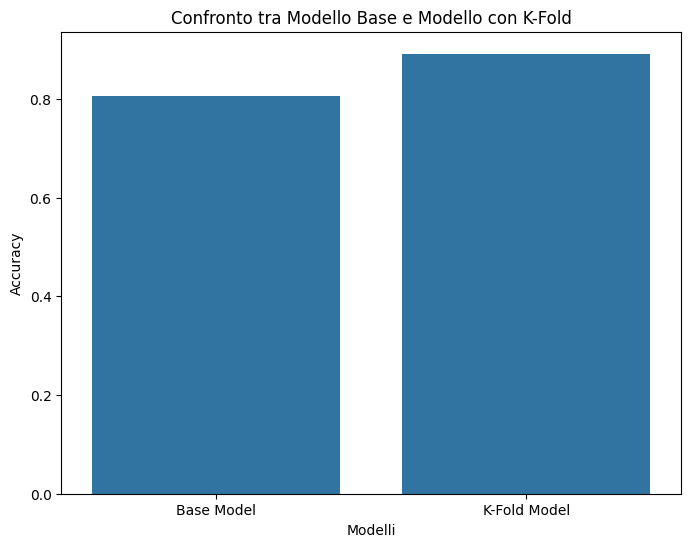

In [38]:
import seaborn as sns

# Calcola l'accuratezza del modello base
accuracy_base = accuracy_score(y_test_3sec, y_pred_3sec)
print(f"Base Model Accuracy: {accuracy_base}")


# Media delle accuratezze su tutte le fold
accuracy_kfold = cv_scores.mean()
print(f"K-Fold Model Accuracy: {accuracy_kfold}")


# Imposta i valori da visualizzare
accuracies = [accuracy_base, accuracy_kfold]
labels = ['Base Model', 'K-Fold Model']

# Crea un grafico a barre
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=accuracies)

# Aggiungi titoli e etichette
plt.title('Confronto tra Modello Base e Modello con K-Fold')
plt.ylabel('Accuracy')
plt.xlabel('Modelli')

# Mostra il grafico
plt.show()


In [39]:
import pandas as pd
import numpy as np

# Carica il dataset
df = pd.read_csv('Data/features_30_secARG.csv')

# Funzione per aggiungere rumore
def add_noise(data, noise_factor=0.01):
    noise = np.random.normal(loc=0.0, scale=noise_factor, size=data.shape)
    return data + noise

# Aggiungi rumore alle features (escludendo la colonna 'label')
augmented_df = df.copy()
features = df.columns.difference(['filename', 'label'])

for feature in features:
    augmented_df[feature + '_noisy'] = add_noise(df[feature])

# Ora 'augmented_df' contiene nuove colonne con dati augmentati
print(augmented_df.head())


          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  rms_var_noisy  \
0              2002.449060            85882.761315  ...      -0.008639   
1              2039.036516  

ORA HO INTRODOTTO IL RUMORE IN MODO DA AVERE PIU DATI 